In [1]:
import zbar
import numpy as np
import matplotlib.pyplot as plt
import transport as tran


In [2]:
Am = np.array([1e-24, 1e-24]) # Atomic masses for each element [g]
rho_i = np.array([1]) # Mass densities [g/cc]
T = np.linspace(1, 10, 100)#, 100]) # Temperature range [eV]
Z = np.array([5, 26]) # Atomic number for each element

# mi = zbar.MeanIonization(Am, rho_i, T, Z)
# Zbar = mi.tf_zbar()
# print(Zbar)
# plt.plot(T, Zbar)

Transport coefficients returned in cgs units.


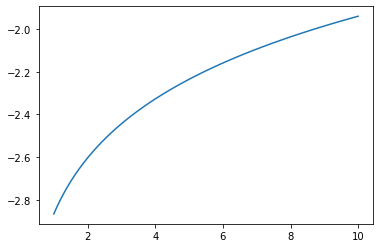

In [11]:
# Instantiate the Stanton-Murillo transport class
yvm = tran.YVM(Am, rho_i, T, Z, units_out='cgs')
smt = tran.SM(Am, rho_i, T, Z, units_out='cgs')
# Compute transport coefficients
eta_s = smt.viscosity()
# eta_y = yvm.viscosity()
plt.plot(T, np.log10(eta_s[0,:,0]))
# plt.plot(T, np.log10(eta_y[0,:,0]))

In [3]:
from plasma_properties import transport

Am = 9.2732796e-23 # Atomic mass of element [g]
rhoi = 20 # Mass density [g/cc]
T = np.logspace(-1, 4, 100) # Temperature [eV]
Z = 26 # Nuclear charge for carbon

# Instantiate the Stanton-Murillo transport submodule
sm = transport.YVM(Am, rhoi, T, Z, units_out='cgs')

# Compute transport coefficients
# D = sm.self_diffusion()
eta = sm.viscosity()
# K = sm.thermal_conductivity()

# print(eta)

viscosity in units: [g/cm s]


Transport coefficients returned in cgs units.
viscosity in units: [g/cm s]


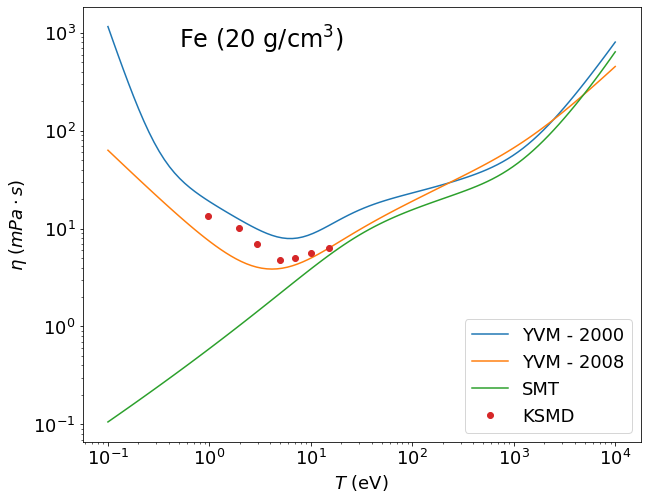

In [5]:
from plasma_properties import parameters
import pandas as pd


sm = transport.SM(Am, rhoi, T, Z, units_out='cgs') 
eta_smt = sm.viscosity()

yvm = tran.YVM(Am, rhoi, T, Z)
eta_yvm00 = yvm.viscosity_00()
eta_yvm08 = yvm.viscosity_08()

KSMD = pd.read_csv('/Users/lukestanek/Desktop/research/mf_modeling/data/Fe/Fe_V_20.csv', header=None)
KSMD = KSMD.to_numpy()

plt.figure(figsize=(10,8))
plt.loglog(T, 100*eta_yvm00, label='YVM - 2000')
plt.loglog(T, 100*eta_yvm08, label='YVM - 2008')
plt.loglog(T, 100*eta_smt, label='SMT')
plt.loglog(KSMD[:,0], KSMD[:,1], 'o', label='KSMD')
# plt.plot(T, k, label='kappa')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('$T$ (eV)', fontsize=18)
plt.ylabel('$\eta \; (mPa \cdot s)$', fontsize=18)
plt.text(0.5, 700, 'Fe (20 g/cm$^3$)', fontsize=24)
plt.legend(fontsize=18)
# x*100

# print(k)

/Users/lukestanek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  


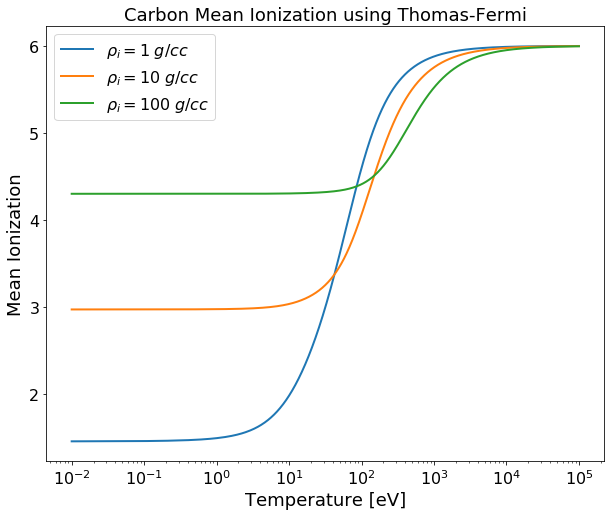

In [82]:
plt.figure(figsize=(10,8))

plt.semilogx(T, Zbar[0,:,0], linewidth=2, label='$\\rho_i = 1 \; g/cc$')
plt.semilogx(T, Zbar[1,:,0], linewidth=2, label='$\\rho_i = 10 \; g/cc$')
plt.semilogx(T, Zbar[2,:,0], linewidth=2, label='$\\rho_i = 100 \; g/cc$')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Temperature [eV]', fontsize=18)
plt.ylabel('Mean Ionization', fontsize=18)
plt.title('Carbon Mean Ionization using Thomas-Fermi', fontsize=18)
plt.legend(fontsize=16)
plt.savefig('TF_zbar.png', bbox_inches='tight', dpi=300)

[1.6735575e-24 1.9944235e-23 9.2732796e-23]


/Users/lukestanek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


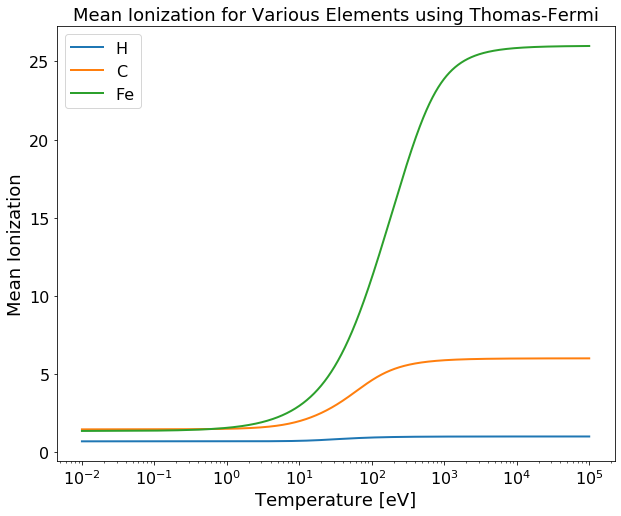

In [86]:

# Initalize parameters for our system
Am = np.array([1.6735575e-24, 1.9944235e-23, 9.2732796e-23]) # Atomic masses for each element [g]
rho_i = 1 # Mass densitiy for all elements [g/cc]
T = np.arange(1e-2, 1e5, 0.1) # Temperature range [eV]
Z = np.array([1, 6, 26]) # Atomic number for each element

# Create a mean ionization object
mi = zbar.MeanIonization(Am, rho_i, T, Z)

# Compute Thomas-Fermi Zbar
Zbar = mi.tf_zbar()

# Plotting
plt.figure(figsize=(10,8))

plt.semilogx(T, Zbar[0,:,0], linewidth=2, label='H')
plt.semilogx(T, Zbar[0,:,1], linewidth=2, label='C')
plt.semilogx(T, Zbar[0,:,2], linewidth=2, label='Fe')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Temperature [eV]', fontsize=18)
plt.ylabel('Mean Ionization', fontsize=18)
plt.title('Mean Ionization for Various Elements using Thomas-Fermi', fontsize=18)
plt.legend(fontsize=16)
plt.savefig('TF_zbar_element_compare.png', bbox_inches='tight', dpi=300)
plt.show()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import transport
import zbar 

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# from plasma_properties import transport

# Atomic mass [g] for each isotope/element - entries correspond to Z array
Am = np.array([1.6735575e-24, 3.344325e-24, 5.0082670843e-24, 1.1525801e-23, 1.9944235e-23, 4.4803895e-23]) 

# Mass density [g/cc]
rho_i = 1

# Temperature range [eV]
T = np.linspace(0.1, 100, 100)

# Nuclear charge for each element - entries correspond to Am array
Z = np.array([1, 1, 1, 3, 6, 13])

# Create the stanton-murillo transport object
sm = transport.SM(Am, rho_i, T, Z, units_out='cgs')

# Compute self-diffusion
D = sm.self_diffusion()

# Plotting
plt.figure(figsize=(10,8))
plt.loglog(T, D[0,:,0], 'b-d', linewidth=3, label='Hydrogen')
plt.loglog(T, D[0,:,1], 'b-x', linewidth=3, label='Deuterium')
plt.loglog(T, D[0,:,2], 'b-v', linewidth=3, label='Tritium')
plt.loglog(T, D[0,:,3], linewidth=3, label='Lithium')
plt.loglog(T, D[0,:,4], linewidth=3, label='Carbon')
plt.loglog(T, D[0,:,5], linewidth=3, label='Aluminum')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Temperature [eV]', fontsize=18)
plt.ylabel('Self-Diffusion $[cm^2/s]$', fontsize=18)
plt.title('Self-Diffusion for Various Isotopes and Elements', fontsize=18)
plt.legend(fontsize=18)
# plt.show()
plt.savefig('isotope_compare.png', bbox_inches='tight', dpi=300)

ValueError: Am values must be > 0

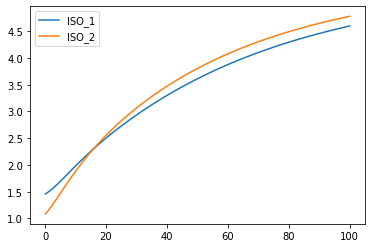

In [13]:
zb = zbar.MeanIonization(Am, rho_i, T, Z, model='TF')
Zavg = zb.tf_zbar()
plt.plot(T, Zavg[0,:,0], label="ISO_1")
plt.plot(T, Zavg[0,:,1], label="ISO_2")
plt.legend()

In [10]:
Am = 1.9944235e-23
rho_i = 1
T = 0.2
Z = 6

zb = zbar.MeanIonization(Am, rho_i, T, Z, model='TF')
Zavg = zb.tf_zbar()
Zavg

array([1.46253677])

In [3]:
x = np.array([1])
print(str(type(x)))

<class 'numpy.ndarray'>


In [6]:
x = np.array([]1)

SyntaxError: invalid syntax (<ipython-input-6-ee26862beb80>, line 1)

In [8]:
class MyError(Exception): 
  
    # Constructor or Initializer 
    def __init__(self, value): 
        self.value = value 
  
    # __str__ is to print() the value 
    def __str__(self): 
        return(repr(self.value)) 
try: 
    raise(MyError(3*2)) 
# Value of Exception is stored in error 
except MyError as error: 
    print('A New Exception occured: ',error.value) 

A New Exception occured:  6


Enter a number:  1


This value is too small, try again!



Enter a number:  2


This value is too small, try again!



Enter a number:  3


This value is too small, try again!



Enter a number:  4


This value is too small, try again!



Enter a number:  5


This value is too small, try again!



Enter a number:  6


This value is too small, try again!



Enter a number:  7


This value is too small, try again!



Enter a number:  8


This value is too small, try again!



Enter a number:  10


Congratulations! You guessed it correctly.


In [12]:
import parameters as params

In [14]:
Z = 26
T = 0.5
Am = 9.2732796e-23
rho_i = 7.874

gamma = params.Params(Am, rho_i, T, Z)
kappa = params.Params(Am, rho_i, T, Z)
g =  gamma.gamma()
# k = kappa.kappa()

In [15]:
g

array([357.82105266])

NameError: name 'cbar' is not defined

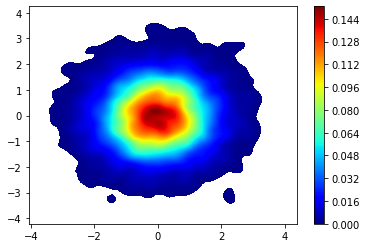

In [63]:
from scipy import stats, integrate
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def gauss_2d(mu, sigma, N):
    x = np.random.normal(mu, sigma, N)
    y = np.random.normal(mu, sigma, N)
    return (x, y)

x,y = gauss_2d(0, 1, 10000)


# # load the coordinates file
# x, y = val
 
# # call the kernel density estimator function
ax = sns.kdeplot(x, y, cmap="jet", n_levels = 200, shade=True, shade_lowest=False, cbar='true')


for label in cbar.ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xticks([-2,0,2])
plt.yticks([-2,-1,0,1,2])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axes().set_aspect('equal')

# plt.savefig('gauss_plot.png', dpi=300, bbox_inches='tight')
# # the function has additional parameters you can play around with to fine-tune your heatmap, e.g.:
# #ax = sns.kdeplot(x, y, kernel="gau", bw = 25, cmap="Reds", n_levels = 50, shade=True, shade_lowest=False, gridsize=100)
 
# plot your KDE


 

In [1]:
6.11/8.4590343e-23

7.223046725321825e+22

In [2]:
2.267/1.9944235e-23

1.1366693182265452e+23

In [3]:
3e-10*1e-3

3e-13

In [5]:
import pyfftw

ImportError: cannot import name '_fftpack' from 'scipy.fftpack' (/Users/lukestanek/anaconda3/lib/python3.7/site-packages/scipy/fftpack/__init__.py)